# Entendendo a adaptação do estudante as aulas online com Machine Learning.

# Contextualização

A pandemia trouxe diversas mudanças no nosso dia-a-dia, e a mais impactante (além do problema sanitário) foi a transferência do ensino presencial para o ensino à distância, que impactou diretamente a vida de milhões de estudantes ao redor do mundo. Neste projeto, utilizaremos modelos de classificação para saber qual o grau de adaptabilidade dos estudantes e o que pode ter influenciado essa medida. 

# Objetivo de Negócio
As aulas online tomaram força durante esse periodo de Covid, porém no tempos atuais podemos encontrar muitas instituições que oferecem esse tipe de aula ao invés das tradicionais presenciais. Nosso grupo tendo sido afetado pelas aulas online durante 1 ano de curso decidimos fazer uma pesquisa mais abrangente sobre essa nova possibilidade, por isso obtivemos um dataset do 

Kaggle: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

Para que esses dados fossem estudados.
Nesse projeto realizaremos uma pesquisa para entender se as aulas online realmente são boas para os estudantes de todas as idade e rendas e se fazer um curso online é realmente uma boa opção para os estudante.

# Bibliotecas Utilizadas

In [1]:
#Importações análise exploratória
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importação KNN
import numpy as np
from pylab import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,fbeta_score, precision_score, recall_score
from sklearn import metrics, preprocessing
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Importações árvore de decisão
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

#Importação SVM
from sklearn.svm import SVC

#Importações Naive Bayes
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB

#Importações PCA
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing

#Importação Joblib
from joblib import dump

# Leitura e visualização do dataset

In [2]:
#Implementação do documento csv.
df = pd.read_csv('students_adaptability_level_online_education.csv')
#Visualiazação dos dados.
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


---

# Analise dos dados dispóniveis
## Ánalise

Com o intuito de buscar respostas para as perguntas que fizemos com relação ao modelo de ensino tele-presencial, fomos em busca de um dataset que pudesse nos mostrar a realidade dos fatos, que pudesse mostrar como de fato foi o ensino das crianças, jovens e adultos durante a pandemia. Encontramos nossa base de dados no Kaggle, infelizmente nossos dados não são nacionais, ou seja, não fizemos um estudo sobre as escolas brasileiras mas sim escolas americanas.

## Os conjuntos de recursos são:
Gênero,
Idade,
Nível de Escolaridade,
Tipo de instituição,
Estudante de TI,
Localização na cidade,
Derramamento de carga,
Condição Financeira,
Tipo de Internet,
Tipo de rede,
Duração da classe,
Auto LMS,
Dispositivo

## Gráficos

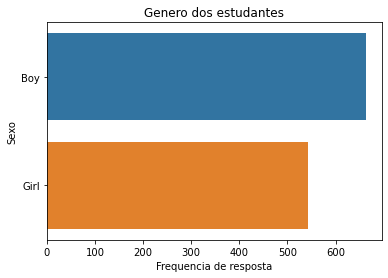

In [3]:
#Gráfico 1 - Coluna Gender/Genero
sns.barplot(x = df['Gender'].value_counts()[:10],
            y = df['Gender'].value_counts()[:10].index)

plt.title("Genero dos estudantes")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Sexo")
plt.show()

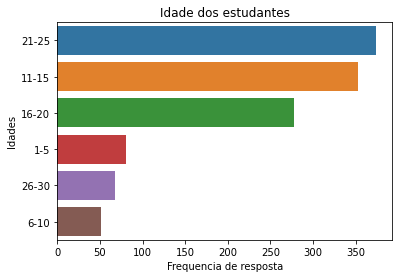

In [4]:
#Gráfico 2 - Coluna Age/Idade
sns.barplot(x = df['Age'].value_counts()[:10],
            y = df['Age'].value_counts()[:10].index)

plt.title("Idade dos estudantes")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Idades")
plt.show()

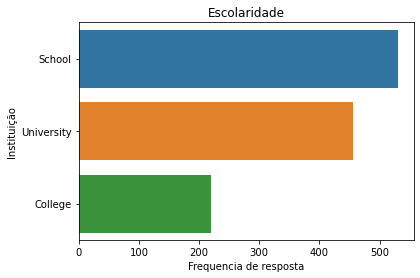

In [5]:
#Gráfico 3 - Coluna Education Level/Nivel educacional
sns.barplot(x = df['Education Level'].value_counts()[:10],
            y = df['Education Level'].value_counts()[:10].index)

plt.title("Escolaridade")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Instituição")
plt.show()

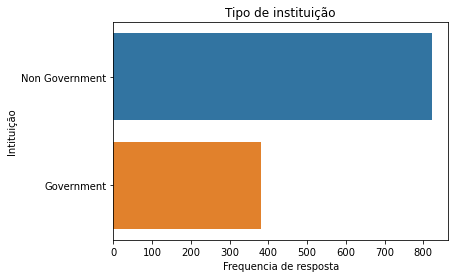

In [6]:
#Gráfico 4 - Institution Type/ Tipo de instituição
sns.barplot(x = df['Institution Type'].value_counts()[:10],
            y = df['Institution Type'].value_counts()[:10].index)

plt.title("Tipo de instituição")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Intituição")
plt.show()

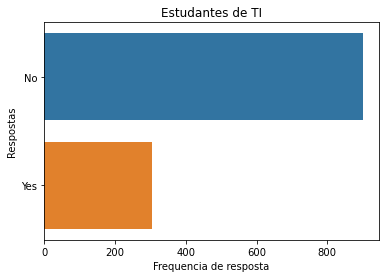

In [7]:
#Gráfico 5 - IT Students/ Estudantes de TI
sns.barplot(x = df['IT Student'].value_counts()[:10],
            y = df['IT Student'].value_counts()[:10].index)

plt.title("Estudantes de TI")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Respostas")
plt.show()

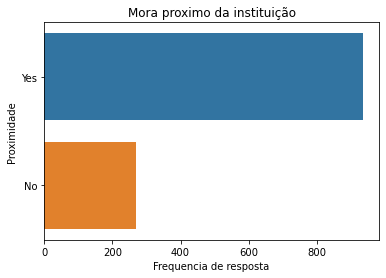

In [8]:
#Gráfico 6 -  Location/ Localização
sns.barplot(x = df['Location'].value_counts()[:10],
            y = df['Location'].value_counts()[:10].index)

plt.title("Mora proximo da instituição")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Proximidade")
plt.show()

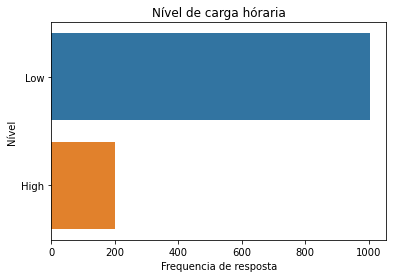

In [9]:
#Gráfico 7 - Load-Shedding/ Nível de carga hóraria
sns.barplot(x = df['Load-shedding'].value_counts()[:10],
            y = df['Load-shedding'].value_counts()[:10].index)

plt.title("Nível de carga hóraria")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Nível")
plt.show()

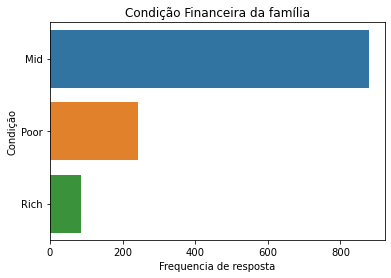

In [10]:
#Gráfico 8 - Financial Condition/ Condição financeira
sns.barplot(x = df['Financial Condition'].value_counts()[:10],
            y = df['Financial Condition'].value_counts()[:10].index)

plt.title("Condição Financeira da família")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Condição")
plt.show()

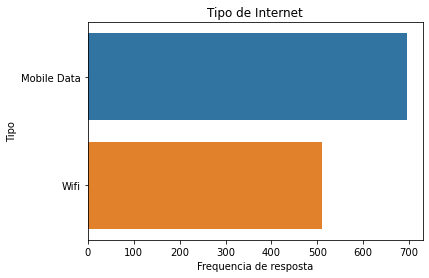

In [11]:
#Gráfico 9 - Coluna Internet Type/ Tipo de internet
sns.barplot(x = df['Internet Type'].value_counts()[:10],
            y = df['Internet Type'].value_counts()[:10].index)

plt.title("Tipo de Internet")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Tipo")
plt.show()

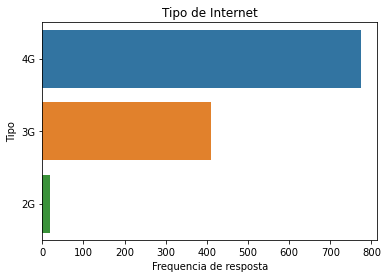

In [12]:
#Gráfico 10 - Network Type/ Tipo de internet
sns.barplot(x = df['Network Type'].value_counts()[:10],
            y = df['Network Type'].value_counts()[:10].index)

plt.title("Tipo de Internet")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Tipo")
plt.show()

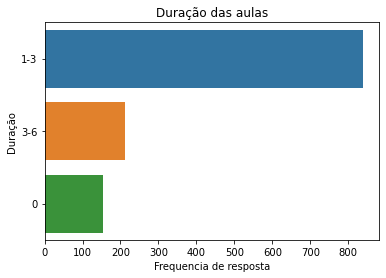

In [13]:
#Gráfico 11 - Class Duration / Duração das aulas
sns.barplot(x = df['Class Duration'].value_counts()[:10],
            y = df['Class Duration'].value_counts()[:10].index)

plt.title("Duração das aulas")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Duração")
plt.show()

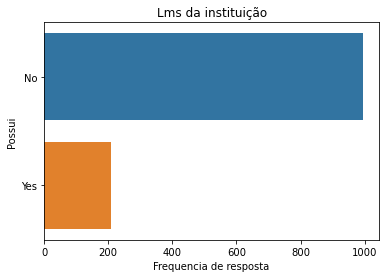

In [14]:
#Gráfico 12 - Self Lms / Lms da instituição
sns.barplot(x = df['Self Lms'].value_counts()[:10],
            y = df['Self Lms'].value_counts()[:10].index)

plt.title("Lms da instituição")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Possui")
plt.show()

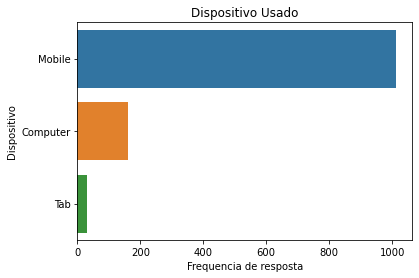

In [15]:
#Gráfico 13 - Device/ Dispositivos
sns.barplot(x = df['Device'].value_counts()[:10],
            y = df['Device'].value_counts()[:10].index)

plt.title("Dispositivo Usado")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Dispositivo")
plt.show()

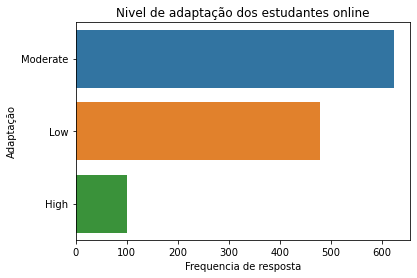

In [16]:
#Gráfico 14 - Adaptivity Level / Nivel de adaptação
sns.barplot(x = df['Adaptivity Level'].value_counts()[:10],
            y = df['Adaptivity Level'].value_counts()[:10].index)

plt.title("Nivel de adaptação dos estudantes online")
plt.xlabel("Frequencia de resposta")
plt.ylabel("Adaptação")
plt.show()

## Ánalise dos Gráficos
**Gráfico 1**
A partir do primeiro gráfico, podemos analisar as frequências de resposta de alunos do sexo masculino e feminino, a partir do qual podemos analisar que a maior parte do nosso conjunto de dados é baseado em respostas masculinas, embora a maior parte da população mundial seja composta por mulheres nascidas biologicamente convocadas.

**Gráfico 2**
Neste gráfico temos a relação de idade das pessoas que responderam a pesquisa, podemos ver que a maioria dos alunos está na faixa de 21 a 25 anos, ou seja, aqueles que fizeram faculdade e o menor número de alunos cujas respostas foram de 6 anos que ainda estavam na escola - alunos de 10 anos.

**Gráfico 3**
Na Figura 3, vemos a relação do setor de educação dos respondentes, observamos que a maioria vive em escolas, e analisamos conforme o **Gráfico 2**, onde podemos ver que as respostas de Relevância de 1 a 20 anos para a maioria das pessoas e um mínimo de 16 a 25 pessoas frequentando universidades e faculdades.

**Gráfico 4**
Na Figura 4, temos a correlação entre agências governamentais e não governamentais.

**Gráfico 5**
Quando se trata da adaptação de alunos de escolas online, a primeira coisa que nos vem à mente é que esses alunos são de TI ou áreas relacionadas à tecnologia, mas na Figura 5 podemos ver que a maioria das respostas dizem que não são de TI alunos.

**Gráfico 6**
Aqui temos uma lista de alunos que moram perto e longe da escola que frequentam, já que nossos dados estão nos EUA a maioria das respostas são sim, afinal os alunos lá são direcionados para Uma instituição perto de casa faz sentido.

**Gráfico 7**
Neste gráfico, observamos o nível de carga horária de cada aluno, dividido em carga horária baixa e carga horária alta.

**Gráfico 8**
A Figura 8 mostra a situação financeira dos alunos, que são divididos em três categorias: médio, superior e inferior.

**Gráfico 9**
O tipo de internet utilizado é muito importante quando estamos falando de cursos online, afinal, para estar conectado em uma sala deve haver internet, e se correlacionarmos os dados apresentados na **Gráfico 8** podemos ver que a maioria dos Alunos não use internet wifi, isso pode ser devido a sua situação financeira ou ao simples fato de você não ter wifi.

**Gráfico 10**
As figuras 10 e 8 e 9 podem ser correlacionadas, afinal a maioria dos alunos usa dados móveis ou internet 4G, mas alguns alunos ainda usam 3G apenas em seus telefones e raramente usam internet 2G que raramente é usada agora.

**Gráfico 11**
O tempo de aula é importante porque se um aluno tem muitas aulas em um dia e usa internet móvel, ele pode perder aula no final do mês porque não tem mais acesso à internet.

**Gráfico 12**
Antes de mais nada, o que é Lms: plataforma LMS, abreviação de Learning Management System, é uma plataforma de ensino que transmite o ambiente educacional presencial para o espaço virtual. Apoia o ensino online e possui uma gama de ferramentas para tornar o aprendizado mais dinâmico e completo.
Ou seja, neste gráfico podemos ver que pouquíssimas agências possuem essa plataforma de auxílio agência, e vemos que a maioria não a utiliza.

**Gráfico 13**
Neste gráfico, a relação de quais dispositivos os alunos usam para fazer as aulas online, no gráfico podemos ver que a maioria usa aparelhos celulares, cerca de 200 alunos usam computadores para responder, e alguns alunos usam tablets para aula.

**Gráfico 14**
Neste gráfico, observamos que a maioria dos alunos que responderam a esta pesquisa estava moderadamente confortável com cursos online, cerca de 500 alunos estavam muito confortáveis ​​ou nada confortáveis ​​com cursos online, e cerca de 100 alunos estavam confortáveis ​​com esses cursos a um nível alto. grau.

# Pré-Processamento.

In [17]:
#Verificação o tipo dos dados.
df.dtypes
#Verificando se existem dados ausentes.
df.info()
# Verificando qual a soma total de dados ausentes.
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


Para maior entendimento dos dados vizualizamos as categorias, podemos observar que todos se encontram definidos como **object** isso precisara ser tratado e transfomado em **int64**.
Tambem observamos que em nosso conjunto de dados não existe dados categorizados como null, ou seja, não temos dados nulos que precisariam ser tratados.

In [18]:
#Transformando os dados não númericos em númericos.
df = df[['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device', 'Adaptivity Level']].apply(lambda x: pd.factorize(x)[0])
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,1,1,0
2,1,1,1,1,0,0,0,0,0,0,0,1,0
3,1,2,2,0,0,0,0,0,1,0,0,1,0
4,1,1,2,0,0,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,1,1,0,0,0,0,0,0,0,0,1,1
1201,1,1,1,0,0,1,1,0,0,0,0,1,0
1202,0,2,2,0,0,0,0,0,1,1,0,1,0
1203,1,1,1,0,0,1,0,0,0,0,0,1,1


Para que possamos seguir com a criação do modelo precisamos transformar nossos dados **object** em **int64** como dito acima, para isso usaremos o método **factorize** e transformaremos nossos dados textuais em númericos definidos em categorias iniadas com 0.

---

# Projeto KNN

O modelo utilizado neste relatório é o K-Nearest Neighbors(KNN), um algoritmo de aprendizagem supervisionada que busca mostrar a similaridade entre vetores(ou dados) por meio da medição da distância entre eles. Quanto mais próximos os 'pontos', mais semelhantes são os dados. O algoritmo KNN utiliza de várias métricas que medem distância entre pontos, como por exemplo, a distância euclidiana, que usa o Teorema de Pitágoras. Com isso, o programador escolhe quantos pontos(ou vizinhos) próximos ele quer considerar no modelo. A imagem a seguir ilustra isso:

In [19]:
# 'Rotulando' o dataset
le = LabelEncoder()
df_fact = df.apply(le.fit_transform)

- Aqui estamos 'rotulando' o dataset. O modelo KNN não consegue trabalhar com strings(palavras), portanto precisamos transformá-las em números para se tornarem 'legíveis' para a máquina.

In [20]:
# Normalizando todos os valores de 'df_fact', exceto a coluna 'Adaptivity Level', que é o Target
scaler = StandardScaler()
df_norm = scaler.fit_transform(df_fact.loc[:, df_fact.columns != "Adaptivity Level"])
df_norm

array([[-0.90415498, -1.0430578 , -1.17609307, ..., -0.72340921,
        -0.45940753, -2.89060981],
       [ 1.10600508, -1.0430578 , -1.17609307, ..., -0.72340921,
         2.17671662, -0.28538556],
       [ 1.10600508, -0.34362282, -0.06804604, ..., -0.72340921,
        -0.45940753, -0.28538556],
       ...,
       [-0.90415498,  0.35581215,  1.04000099, ...,  1.21803422,
        -0.45940753, -0.28538556],
       [ 1.10600508, -0.34362282, -0.06804604, ..., -0.72340921,
        -0.45940753, -0.28538556],
       [ 1.10600508,  0.35581215,  1.04000099, ...,  1.21803422,
        -0.45940753, -0.28538556]])

- Normalizar as features do dataset costuma ajudar no treinamento e geralmente aumenta um pouco a precisão do modelo

In [21]:
# Separando as features e o target
X = df_norm
y = df_fact['Adaptivity Level']

In [22]:
# Separando os dados de treino e de teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 109)

- Separamos as **features** ( "características" de cada estudante) e o **target**( "resultado" da classificação) em **X** e **Y**, respectivamente.   
      
- Utilizamos uma função do ScikitLearn chamada **TrainTestSplit**, que separa os dados em dados de treino do modelo e em dados para testar o modelo. A proporção é de **70/30%**, respectivamente. O "**random_state**" serve para manter os dados de treinamento e teste iguais em todas as vezes que o comando for executado, caso contrário, os dados de treino e teste seriam aleatorizados e a precisão do modelo oscilaria.


## Métricas de Desempenho
- **Precisão**

In [23]:
precisao = {}

def metricas(k, metrica):
    for i in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        if metrica == accuracy_score:
            precisao.update({k:round(metrica(y_test, y_pred), 3)})
        elif metrica == fbeta_score:
            precisao.update({k:round(metrica(y_test, y_pred, average = 'macro', beta=1.0), 3)})
        else:
            precisao.update({k:round(metrica(y_test, y_pred, average = 'macro'), 3)})
        k += 1
    print('k =',max(precisao, key=precisao.get),'/', max(precisao.values()))

- Aqui utilizamos uma função para testar a variável K com todos os números de 1 a 15, para assim sabermos qual o valor de K trará a maior precisão

In [24]:
#acurácia
metricas(1, accuracy_score)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

k = 3 / 0.809


In [25]:
#F-Beta
metricas(1, fbeta_score)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

k = 1 / 0.777


C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
#Recall
metricas(1, recall_score)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

k = 1 / 0.802


In [27]:
#Precisão
metricas(1, precision_score)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

k = 4 / 0.795


- **Validação Cruzada**

**Obs: Para validação cruzada e para a matriz de confusão, o valor de K utilizado é 3**

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, X, y, cv = k_folds)

print(scores)

[0.80082988 0.81327801 0.8340249  0.78008299 0.79253112]


C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\positivo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

- **Matriz de Confusão**

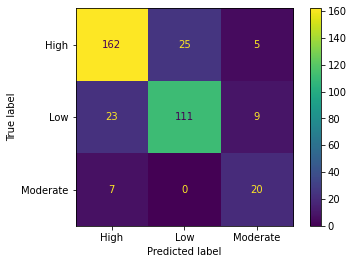

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['High','Low','Moderate'])

cm_display.plot()
plt.show() 

- **Matriz de Correlação entre as Variáveis**

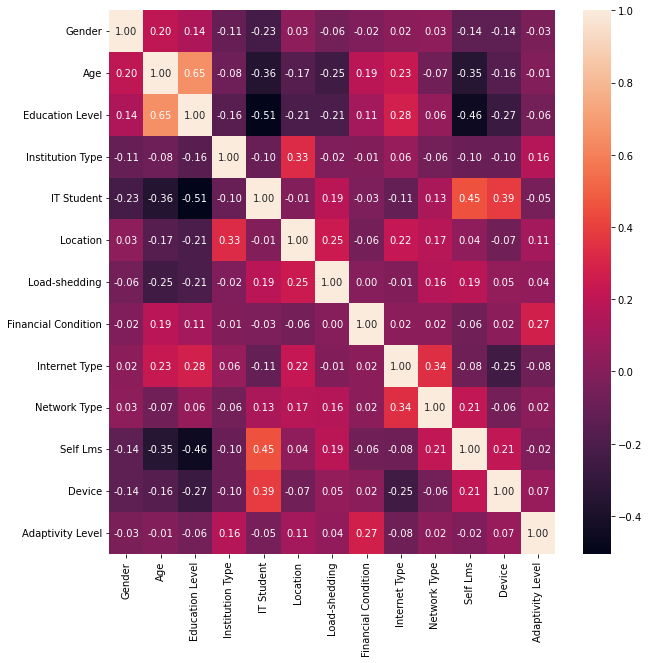

In [31]:
def matriz_de_confusão(data):
    # init figure size
    rcParams['figure.figsize'] = 10, 10
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    #fig.savefig('corr.png')

matriz_de_confusão(df_fact)

## Conclusão
O KNN é considerado um modelo simples e fácil de entender, com treinamento rápido e pouca exigência computacional, o que torna o K-Nearest Neighbors recomendado para hardwares limitados. Porém, essa simplicidade sacrifica um pouco da precisão do modelo tornando-o menos atrativo para o uso empresarial/científico.
Nos dias de hoje, o modelo KNN fica em segundo plano, já que o poder computacional não é mais um problema como era antigamente, o que dá mais espaço à modelos mais robustos (e mais precisos).

---

# Projeto Árvore de Decisão.

# Método

Trabalhando com base em nosso DataFrame selecionado, optei por realizar o modelo de árvore de decisão, afinal o modelo pode lidar com grandes conjuntos de dados e pode prever variáveis binárias categóricas e quantitativas. O algoritmo foi criado em 1983 por J. Ross Quinlan e por isso é conhecido como o "Pai das Árvores de Decisão". Uma árvore de decisão é uma representação visual de todos os caminhos de ação possíveis que uma pessoa pode seguir para tomar uma decisão. Ou seja, é uma ferramenta de representação visual que pode auxiliar na tomada de decisões, orientando diferentes caminhos.

Uma árvore de decisão consiste em várias formas gráficas (símbolos), muito semelhante a um fluxograma. Esses símbolos formam nós e ramos que dão forma à árvore e organizam os caminhos a serem seguidos pelas decisões. Um nó pode corresponder a uma ação, probabilidade, condição ou decisão a ser tomada. Ramificações representam caminhos que podem ser seguidos, ou seja, links entre nós. Normalmente, as árvores de decisão começam com um único nó, raiz, que se ramifica para outros nós contendo possíveis opções ou resultados. Cada uma dessas ramificações leva a outros nós que são subdivididos em outros nós filhos. Esse comportamento se repete até que todas as possibilidades sejam mapeadas, resultando em uma estrutura em árvore.

Comumente, as árvores de decisão são construídas horizontalmente, começando no lado esquerdo da página e movendo-se para a direita, mas algumas pessoas preferem construir verticalmente, de cima para baixo. O importante aqui é que a árvore seja construída de forma hierárquica, ou seja, as dependências entre os nós são bem definidas, claras e seguem a ordem dos eventos.

In [32]:
#Definindo X e y
X = df[['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device']]
y = df['Adaptivity Level']

## Modelagem Árvore de Decisão

In [33]:
#Define quantos % serão utilizados 
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.30, random_state=42)

In [34]:
#Criterios para medidas comuns de impureza da árvore de decisão (Classificação)
arvore = DecisionTreeClassifier()

parameters = {'criterion':('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': (None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)}

grid = GridSearchCV(arvore, parameters)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.8370165745856354

Para melhor analise dos dados e desempenho do modelo farei usso de todos os parametros fornecidos pela biblioteca, meu modelo fara uma avaliação de todos os criterios e avalia qual o melhor para que a árvore tenha um bom resultado. 
**OBS:** Esses criterios são usados para medidas comuns de impureza do tipo de classificação no modelo da árvore.

In [35]:
criterion = ['gini', 'entropy', 'log_loss']
max_depths = list(range(1, 20))
param_grid = dict(criterion=criterion, max_depth=max_depths)
dtc = DecisionTreeClassifier()
dtc = GridSearchCV(dtc, param_grid, scoring='accuracy')
dtc.fit(X_train, y_train)
print(dtc.best_params_)

{'criterion': 'gini', 'max_depth': 15}


Nesse caso os melhores criterios avaliados pelo modelo será Gini, max_depth e 15.
**OBS:** O criterio númerico terá alterações a cada vez que o modelo for regerado.

## Resultados

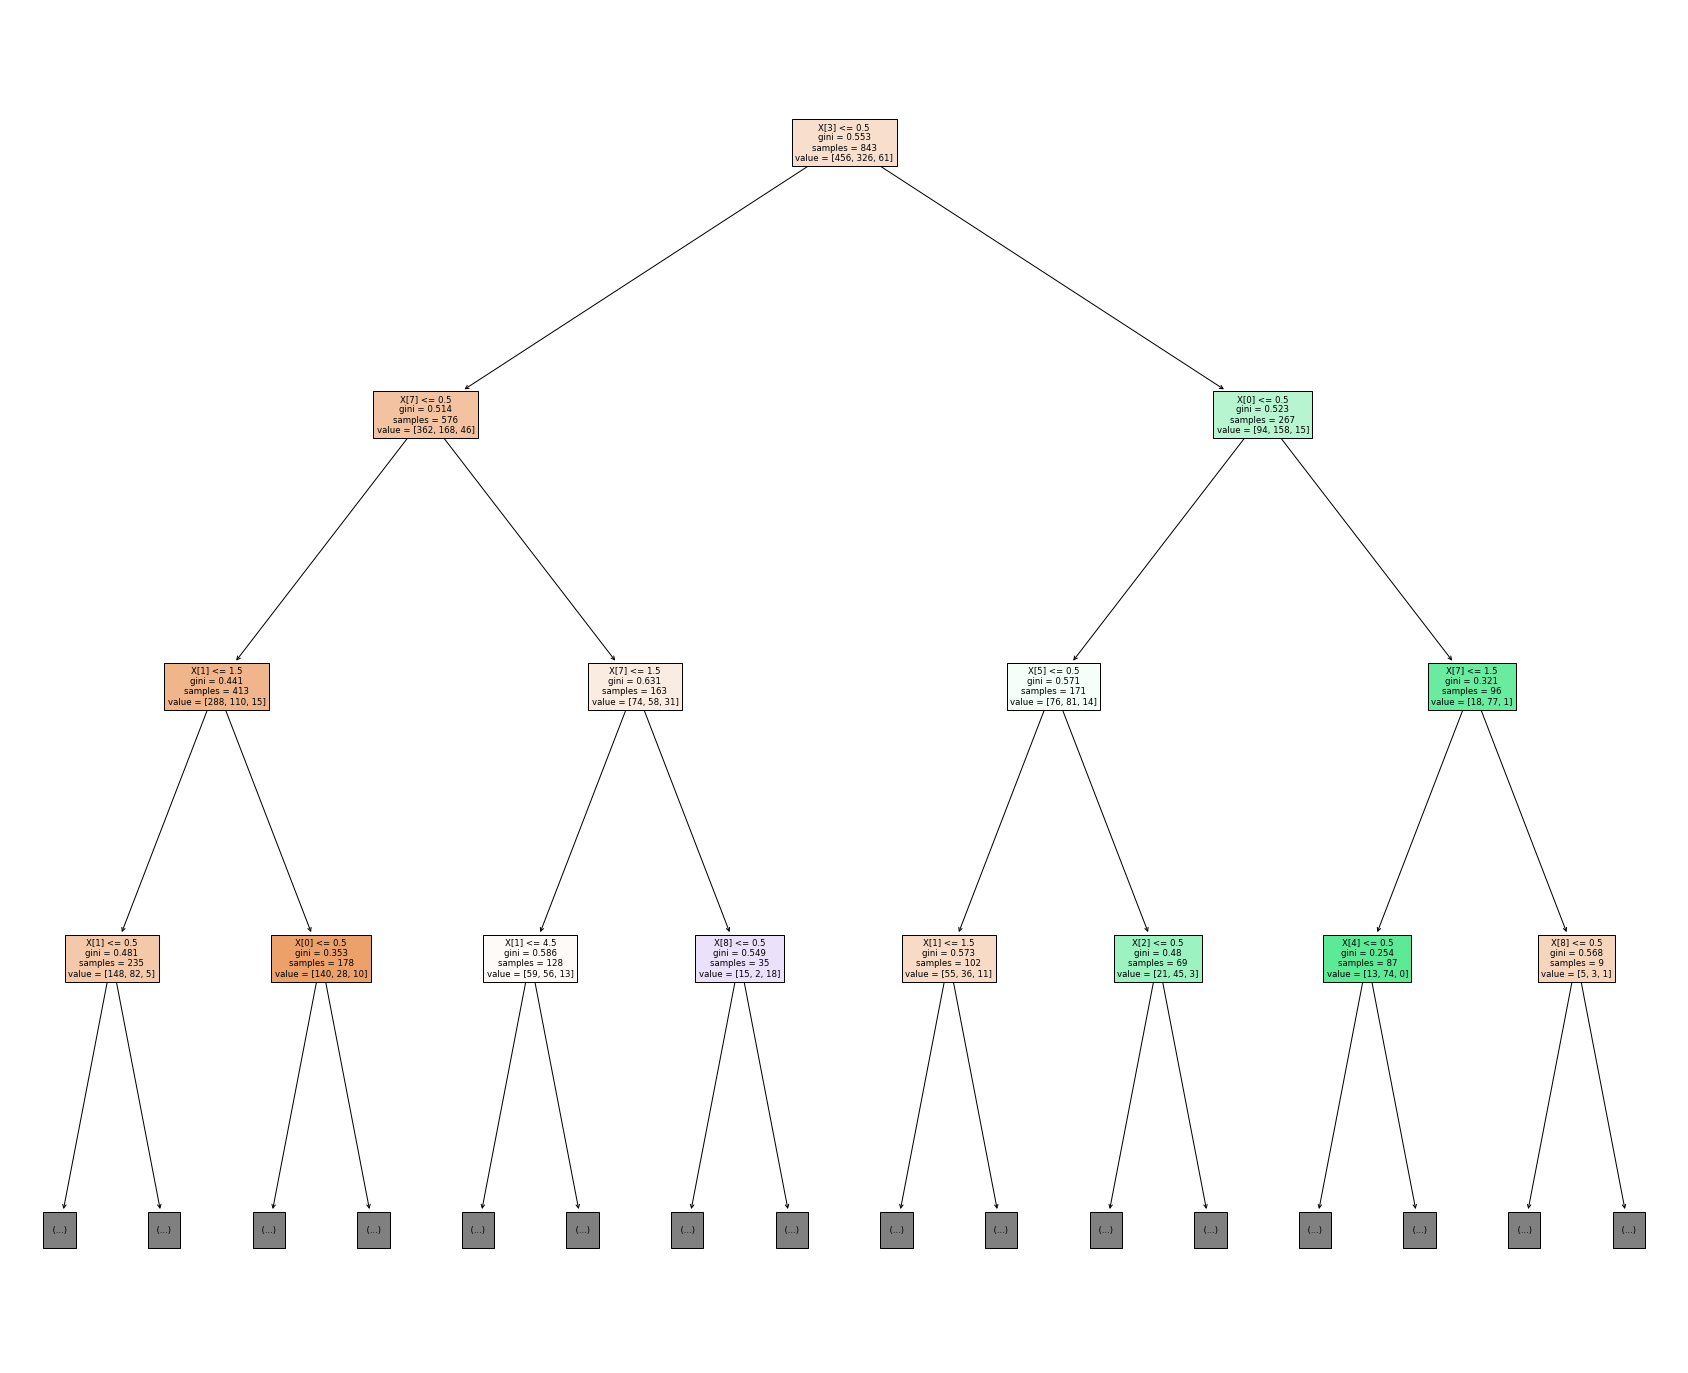

In [36]:
# Gera a Imagem da árvore
fig = plt.figure(figsize=(30,25)) #Aumentar a fonte da figura
arvore_bonitinha = tree.plot_tree(grid.best_estimator_, filled=True, max_depth=3)
plt.show()
#Salva a imagem nos documentos
#fig.savefig('Árvore_Online_Estudantes.pdf')

Diagarma do inicio da árvore de decisão.

A árvore de decisão é construída de forma hierárquica, ou seja, as dependências entre os nós são bem definidas, claras e seguem a ordem dos eventos.

In [37]:
dtc_param = pd.DataFrame(dtc.cv_results_)[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)
dtc_param['params'] = dtc_param['params'].astype('string')
novo = dtc_param['params'].str.split(',', expand=True)
dtc_param['criterion'] = novo[0]
dtc_param['max_depth'] = novo[1]
dtc_param['criterion'] = dtc_param['criterion'].replace("{'criterion': '", '', regex=True)
dtc_param['criterion'] = dtc_param['criterion'].replace("'", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].replace("'max_depth': ", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].replace("}", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].astype('int')
dtc_param.drop('params', axis=1, inplace=True)

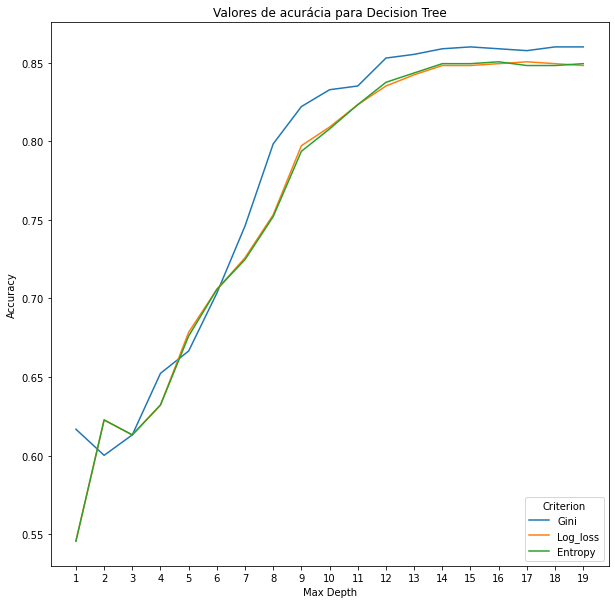

In [38]:
sns.lineplot(data=dtc_param, x='max_depth', y='mean_test_score', hue='criterion')
plt.title('Valores de acurácia para Decision Tree')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(max_depths)
plt.legend(title='Criterion', labels=['Gini', 'Log_loss', 'Entropy'], loc='lower right')
plt.show()

Medido pelo índice de Gini desenvolvido por Conrado Gini em 1912 heterogeneidade de dados. Portanto, pode ser usado para medir uma impureza existente.

Quando o índice é igual a 0 o nó é um nó puro. Por outro lado, quando mais próximo o valor chega de 1 o nó é impuro, analisando nossa árvore, podemos observar que seus valores, mesmo sendo bons índices para um olheiro, não são agradeveis para o desempenho do modelo e um expecialista, afinal nossa acuracia chega perto de 1 atingindo 0,87%. Ou seja, analisando os dados fornecidos no dataset e pretendendo medir o nivel de adaptação dos estudantes.

## Métricas

In [39]:
#Implementação do método ".predict"
y_pred = grid.predict(X_test)

#Mostra precision, recall, fi-score, support, accuracy, macro avg, weighted avg
target_names = ['Moderate', 'Low', 'High']
print(classification_report(y_test, y_pred, target_names=target_names))
#0-Moderate 1-Low 2-High

              precision    recall  f1-score   support

    Moderate       0.78      0.93      0.85       169
         Low       0.93      0.81      0.86       154
        High       0.84      0.54      0.66        39

    accuracy                           0.84       362
   macro avg       0.85      0.76      0.79       362
weighted avg       0.85      0.84      0.83       362



## Matriz de confusão

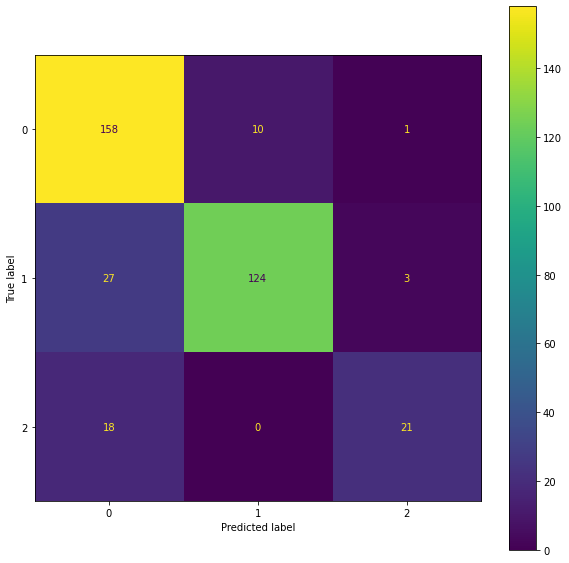

In [40]:
#Cria o gráfico da matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
plt.rc('font', size=10) # bigger font sizes
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Interpretação matriz de confusão - Árvore de decisão.

**Classe moderada (0)**

Em uma matriz de 3 dimensões as interpretações dos dados será feita de forma diferente.

**TP/VP - Verdadeiro positivo.**

O valor real e o valor previsto devem ser os mesmos. (0,0) Assim, em relação à classe Moderate (0), o valor da célula 1 é o valor TP. **158 em Amarelo**.

**FN/FN - Falso negativo.**

Para relalizar o entendimento dos valores falsos negativos temos que realizar uma conta simples, precisamos somar a célula 2 e célula 3 assim sento. **10+1 = 11** Valores previstos como falsos negativos.

**FP/FP - Falso positivo.**

Assim como o Falso negativo para entender o resultado falso positivo tambem é necessario fazer uma conta simples. Onde somamos célula 4 + célula 7 assim sendo. **27+18 = 45** Valores previstos como falsos positivos.

**TN/VN - Verdadeiro negativo.**

A soma feita para o entendimento dos valores verdadeiros negativos por mais que simples comparada as anteriores será denominada de conta maior. Sendo célula5 + célula6 + célula8 + célula9, ou seja. **124+3+0+21 = 148** Valores previstos como verdadeiros negativos.

**Classe baixa (1)**

**TP:** Valor da célula 5. **124 em verde**.

**FN:** Soma das célula4 + célula6. **27+3 = 30** Valores previstos como falsos negativos.

**FP:** Soma das célula2 + célula8. **10+0 = 10** Valores previstos como falsos positivos.

**TN:** Soma maior das célula1 + célula3 + célula7 + célula9. **158+1+18+21 = 198** Valores previstos como Verdadeiros positivos. 

**Classe alta (2)**

**TP:** Valor da célula 9. **21 em violeta**.

**FN:** Soma das célula7 + célula8. **18+0 = 18** Valores previstos como falsos negativos.

**FP:** Soma das célula3 + célula6. **1+3 = 4** Valores previstos como falsos positivos.

**TN:** Soma maior das célula1 + célula2 + célula4 + célula5. **158+10+27+124 = 319** Valores previstos como Verdadeiros positivos. 

Em análise geral para todas as classes vemos que por mais que o modelo árvore de decisão tenha suas vantagens não analisa muito bem nossos dados, como vimos anteriormente nossa acuracia se aproxima de 1 sendo 0,8 o que não é bom para o modelo, o ideal seria se manter mais proximo de 0 e podemos comprovar isso com os dados Verdadeiros negativos obtidos na matriz de confusão onde esses valores são bem autos chegando ate a 319 por exemplo previstos incorretamente.

## Validação Cruzada

In [41]:
scorestree = cross_val_score(grid, X, y, cv=5, scoring='accuracy' )
print("Validação cruzada: ", scorestree)
print("Score Médio de Validação Cruzada: ", scorestree.mean())
#print("Número de Scores usado na Média: ", len(scorestree))

Validação cruzada:  [0.8879668  0.86307054 0.86307054 0.85477178 0.82987552]
Score Médio de Validação Cruzada:  0.8597510373443983


## Vantagens e Desvantagens - Árvore de Decisão

### Vantagens
Facilidade de compreensão;
Podem ser úteis com ou sem dados concretos, e quaisquer dados requerem o mínimo de preparação;
Novas opções podem ser adicionadas às árvores existentes
Seu valor pode ser escolhido dentre a melhor opções

### Desvantagens
Árvores de decisão podem se tornar excessivamente complexas. Em tais casos, um diagrama de influência mais compacto pode ser uma boa alternativa. Diagramas de influência focam em decisões mais críticas, entradas e objetivos.

---

# Projeto SVM

# Método
Para realizar uma dessas análises utilizamos o modelo SVM - Support Vector Machine. Trata-se de um modelo de aprendizagem de máquina supervionado que deriva de duas fundamentações sólidas: Teoria da Aprendizagem Estatísta e Otimização Matemática. Na prática o SVM coloca em primeiro lugar a classificação das classes, definindo assim cada ponto pertencente a cada uma das classes, e em seguida maximiza a margem. Ou seja, ele primeiro classifica as classes corretamente e depois em função dessa restrição define a distância entre as margens

In [42]:
from sklearn.svm import SVC

classifier = SVC(gamma='auto')
classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [43]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.87      0.71       169
           1       0.79      0.52      0.63       154
           2       0.77      0.26      0.38        39

    accuracy                           0.65       362
   macro avg       0.72      0.55      0.57       362
weighted avg       0.70      0.65      0.64       362



In [44]:
# Aplicando o SVM

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
decision_function_shape = ['ovo', 'ovr']
C = [0.1, 1, 10, 100, 1000]
gama = [1, 0.1, 0.01, 0.001, 0.0001]
param_grid = dict(kernel=kernel, decision_function_shape=decision_function_shape)

svc = SVC(probability=True, random_state=42)
svc = GridSearchCV(svc, param_grid, scoring='accuracy')
  
svc.fit(X_train, y_train)

print(svc.best_params_)

{'decision_function_shape': 'ovo', 'kernel': 'poly'}


In [45]:
svc_param = pd.DataFrame(svc.cv_results_)[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)
svc_param['params'] = svc_param['params'].astype('string')
novo = svc_param['params'].str.split(',', expand=True)
svc_param['decision_function_shape'] = novo[0]
svc_param['kernel'] = novo[1]
svc_param['decision_function_shape'] = svc_param['decision_function_shape'].replace("{'decision_function_shape': '", '', regex=True)
svc_param['decision_function_shape'] = svc_param['decision_function_shape'].replace("'", '', regex=True)
svc_param['kernel'] = svc_param['kernel'].replace("'kernel': '", '', regex=True)
svc_param['kernel'] = svc_param['kernel'].replace("'}", '', regex=True)
svc_param.drop('params', axis=1, inplace=True)

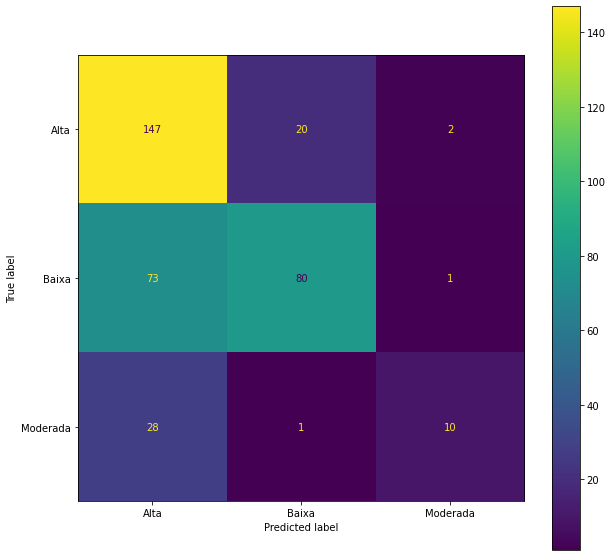

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

svcm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Alta','Baixa','Moderada'])

svcm_display.plot()
plt.show() 

In [47]:
scorestree = cross_val_score(classifier, X, y, cv=5, scoring='accuracy' )
print("Validação cruzada: ", scorestree)

Validação cruzada:  [0.69294606 0.6473029  0.69709544 0.66390041 0.70124481]


## Vantagens e Desvantagens do SVM

Vantagens:

Eficaz em casos de alta dimensão.
É eficiente em termos de memória, pois usa um subconjunto de pontos de treinamento na função de decisão.
Diferentes funções do kernel podem ser especificadas para as funções de decisão e é possível especificar kernels personalizados.

Desvantagens:

O SVM tem um desempanho melhor em bases de dados grandes, por isso não foi o melhor modelo utilizado por nós. 


---

# Projeto Naive Bayes

In [48]:
#Importação e Visualização dos Dados
df = pd.read_csv ("students_adaptability_level_online_education.csv")

In [49]:
#Fazendo alterações de nome nos dados
df.rename(columns = {'Adaptivity Level':'Adaptabilidade'},inplace = True)
df.rename(columns = {'Age': 'Faixa etaria'},inplace = True)

df.replace("Boy","Menino",inplace=True)
df.replace("Girl","Menina",inplace=True)
df.replace("Mid","Middle Class",inplace=True)
df.replace("Poor","Lower Class",inplace=True)
df.replace("Rich","Upper Class",inplace=True)
#df

In [50]:
#uma vez que a idade vem como uma faixa e é uma sequência, python vai classificar automaticamente por ordem alfabética
#ser capaz de classificar numericamente, dividir o intervalo e usar o limite inferior 
col1 = df["Faixa etaria"].apply(lambda x: x.split("-")[0])
df1 = df.join(col1.to_frame(name="Idade limite mais baixa"))
df1.drop(['Faixa etaria'], axis = 1, inplace = True)
df1

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptabilidade,Idade limite mais baixa
0,Menino,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate,21
1,Menina,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate,21
2,Menina,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate,16
3,Menina,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate,11
4,Menina,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Menina,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16
1201,Menina,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate,16
1202,Menino,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate,11
1203,Menina,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16


In [51]:
#transformando as variaveis em int
for variaveis in ['Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptabilidade', 'Idade limite mais baixa']:
    df1[variaveis] = LabelEncoder().fit_transform(df1[variaveis])

In [52]:
# O Algoritmo requer dados na mesma escala. Vamos escalonar os dados
scaler = OrdinalEncoder()
names = df1.columns
d = scaler.fit_transform(df1)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(10)

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptabilidade,Idade limite mais baixa
0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,3.0
1,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,3.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,1.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0
5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0
8,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,2.0
9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0


In [53]:
train = scaled_df.drop(['Adaptabilidade','Gender',],axis = 1)
test = scaled_df['Adaptabilidade']

In [54]:
# Separando em dados de treino e Teste
X_train, X_test, y_train, y_test=train_test_split(train,test ,test_size=0.33,random_state=42)

### 5° **Criando a Máquina Preditiva com Naive Bayes**

In [55]:
# Modelagem - Treinando o Modelo classificador 
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.65      0.42      0.52        40
         1.0       0.73      0.66      0.69       166
         2.0       0.66      0.77      0.71       192

    accuracy                           0.69       398
   macro avg       0.68      0.62      0.64       398
weighted avg       0.69      0.69      0.68       398



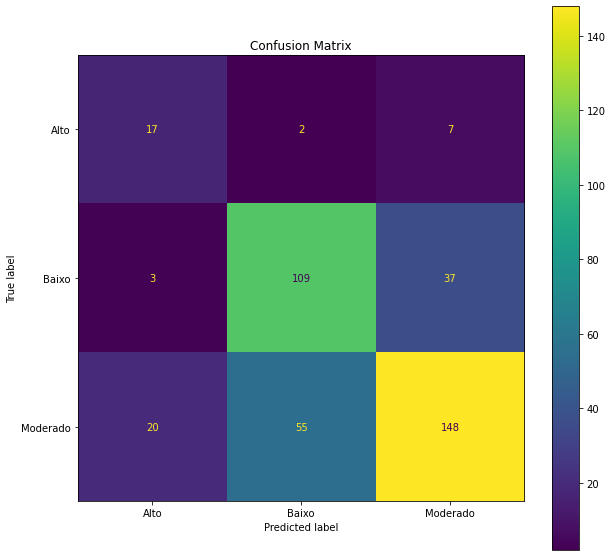

In [56]:
#Display recurso de destino adaptabilidade
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(nb.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["Alto","Baixo","Moderado"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

O termo de adaptabilidade é uma combinação de satisfação geral dos alunos e o quanto eles se adaptaram à educação online. Não, a variável não se baseia no desempenho. É uma seleção direta de alunos.

In [57]:
#Validação Cruzada
scorestree = cross_val_score(grid, X, y, cv=5, scoring='accuracy' )
print("Validação cruzada: ", scorestree)

Validação cruzada:  [0.87966805 0.86307054 0.86307054 0.85477178 0.8340249 ]


# Conclusão
Naive Bayes é o algoritmo mais simples e poderoso. Apesar dos grandes avanços recentes no aprendizado de máquina, ele mostrou sua utilidade. Ele tem sido usado em aplicativos que variam de analítica de texto a sistemas de recomendação.
Este classificador é empregado quando os valores do preditor são contínuos e devem seguir uma distribuição gaussiana.

---

# Principal Component Analysis (PCA)

In [58]:
genes = ['gene' + str(i) for i in range(1,1206)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.read_csv('students_adaptability_level_online_education.csv')

In [59]:
#Transformando os dados não númericos em númericos.
data = data[['Gender', 'Age', 'Class Duration', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device', 'Adaptivity Level']].apply(lambda x: pd.factorize(x)[0])
print(data.head())
print(data.shape)

   Gender  Age  Class Duration  Education Level  Institution Type  IT Student  \
0       0    0               0                0                 0           0   
1       1    0               1                0                 0           0   
2       1    1               1                1                 1           0   
3       1    2               1                2                 0           0   
4       1    1               2                2                 0           0   

   Location  Load-shedding  Financial Condition  Internet Type  Network Type  \
0         0              0                    0              0             0   
1         0              1                    0              1             0   
2         0              0                    0              0             0   
3         0              0                    0              1             0   
4         0              0                    1              1             1   

   Self Lms  Device  Adaptivity 

In [60]:
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) 

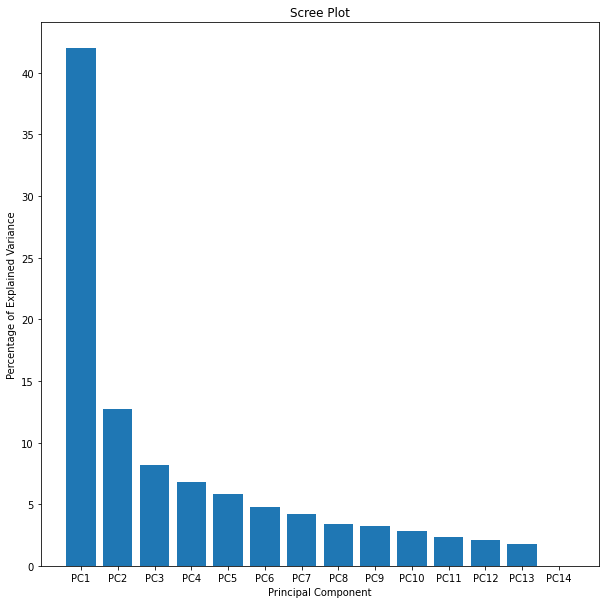

In [61]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

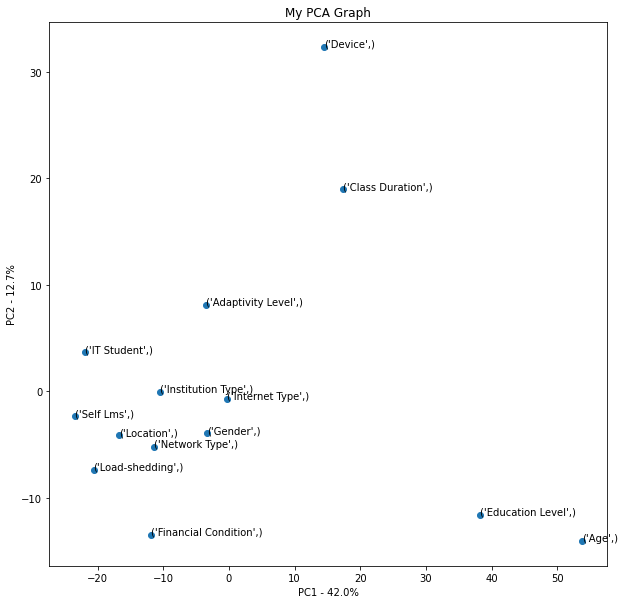

In [62]:
pca_df = pd.DataFrame(pca_data, index=[['Gender', 'Age', 'Class Duration', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device', 'Adaptivity Level']], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [63]:
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene8       0.042258
gene292     0.042258
gene802     0.042258
gene661     0.042258
gene300     0.042258
gene1129    0.042258
gene920     0.041987
gene457     0.041987
gene595     0.041987
gene355     0.041987
dtype: float64


---

## Joblib
Coloquei os arquivos nesse link: 

https://github.com/HannaMendes/Adaptacao-aulas-online/tree/main/Joblib 

para quem quiser usar.

In [64]:
dump(knn, 'knn.joblib') #KNN
dump(nb, 'nb.joblib') #Naive Bayes
dump(classifier, 'classifier.joblib') #SVM
dump(dtc, 'dtc.joblib') #Árvore
dump(X_test, 'X.joblib') #X
dump(y_test, 'y.joblib'); #y

# Referências
https://ferramentasdaqualidade.org/arvores-decisorias/.

https://en.wikipedia.org/wiki/Decision_tree.

https://www.digitalhouse.com/br/blog/arvore-de-decisao/.

https://www.digitalhouse.com/br/blog/arvore-de-decisao/.

https://scikit-learn.org/stable/modules/tree.html.

https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/.